<a href="https://colab.research.google.com/github/SOwens-Create/BabyPython/blob/master/FullCode_Additional_FMST_Project_LearnerNotebook_SOWENS_EmployeePromotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

### Business context

Employee Promotion means the ascension of an employee to higher ranks, this aspect of the job is what drives employees the most. The ultimate reward for dedication and loyalty towards an organization and the HR team plays an important role in handling all these promotion tasks based on ratings and other attributes available.

The HR team in JMD company stored data on the promotion cycle last year, which consists of details of all the employees in the company working last year and also if they got promoted or not, but every time this process gets delayed due to so many details available for each employee - it gets difficult to compare and decide.


### Objective

For the upcoming appraisal cycle, the HR team wants to utilize the stored data and leverage machine learning to make a model that will predict if a person is eligible for promotion or not. You, as a data scientist at JMD company, need to come up with the best possible model that will help the HR team to predict if a person is eligible for promotion or not.


### Data Description

- employee_id: Unique ID for the employee
- department: Department of employee
- region: Region of employment (unordered)
- education: Education Level
- gender: Gender of Employee
- recruitment_channel: Channel of recruitment for employee
- no_ of_ trainings: no of other training completed in the previous year on soft skills, technical skills, etc.
- age: Age of Employee
- previous_ year_ rating: Employee Rating for the previous year
- length_ of_ service: Length of service in years
- awards_ won: if awards won during the previous year then 1 else 0
- avg_ training_ score: Average score in current training evaluations
- is_promoted: (Target) Recommended for promotion

## Importing necessary libraries

In [90]:
#Import libraries for dataframe methods
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn import tree
from os import system
from statistics import mean
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Oversampling Library
from imblearn.over_sampling import SMOTE

#Undersampling Library
from imblearn.under_sampling import RandomUnderSampler

#Import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
import plotly.express as px

## Loading the dataset

In [28]:
#Mounting the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
#Reading the dataset
df=pd.read_csv('/content/drive/MyDrive/Machine_Learning_and_AI_Class/employee_promotion.csv')

## Data Overview

- Observations
- Sanity checks

In [30]:
#Using the head method to see the first 5 rows of data
#Data is categorical and continuous.
#Several columns will need to be categorized.
#It is not immediatel known whether the employee ID is
#a relevant category.
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0


In [31]:
#Using the info method to get an overview of
#null objects, value counts, and datatypes.
#The education, previous year rating, and
#avg_training_score columns have null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  int64  
 11  avg_training_score    52248 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 5.4+ MB


In [32]:
#The data has 54808 rows and 13 columns
df.shape

(54808, 13)

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. How is the distribution of average training score of  employee ?
2. How is the distribution age of  employee ?
3. How does the change in length of service (`length_of_service`) vary by the employee's promotion status (`is_promoted`)?
4. How does the previous rating(`previous_year_rating`) vary by the employee's promotion status (`is_promoted`)?
5. What are the attributes that have a strong correlation with each other?



#### The below functions need to be defined to carry out the Exploratory Data Analysis.

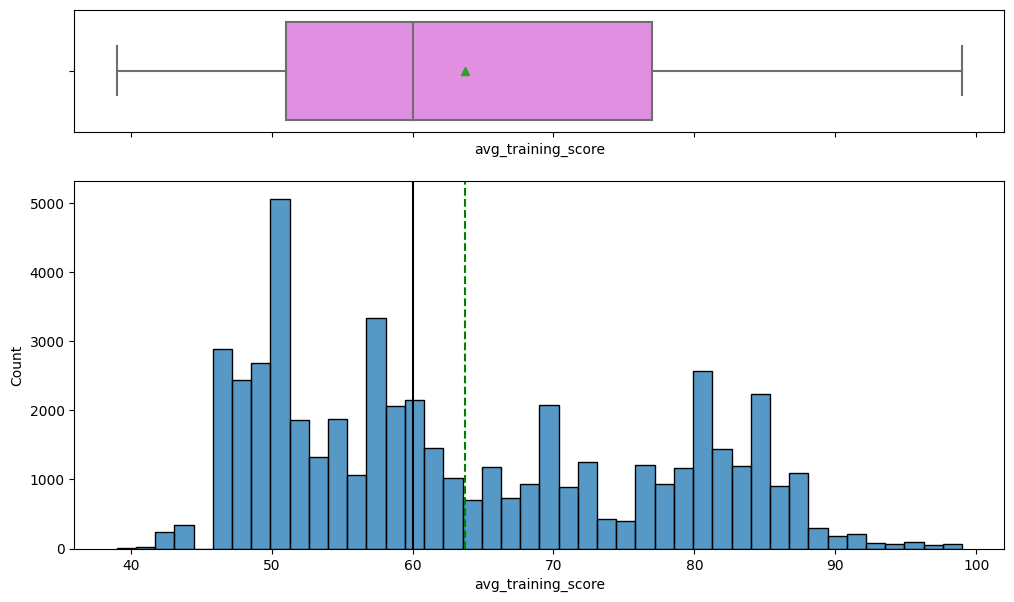

In [33]:
#Using the function to plot a boxplot and a histogram along the same scale.
#Question 1 - How is the distribution of average training score of employee?
#The mean training score is approximately 64.
#The median training score is approximately 60.

def histogram_boxplot(df, avg_training_score, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=avg_training_score, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=df, x=avg_training_score, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=avg_training_score, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df['avg_training_score'].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df['avg_training_score'].median(), color="black", linestyle="-"
    )  # Add median to the histogram

histogram_boxplot(df, 'avg_training_score')

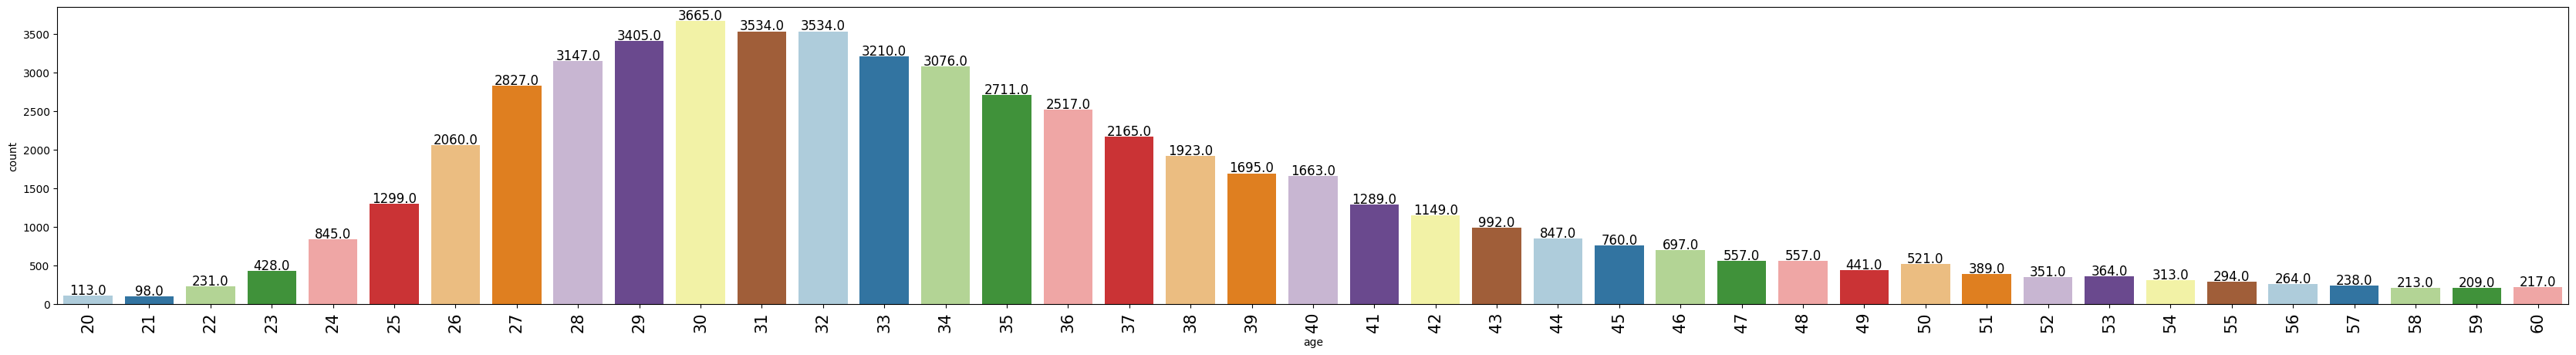

In [34]:
#Using function to create labeled barplots
#Question 2 - How is the age distribution of the employee?
#The majority of employees are approximately 30 years old.
#The youngest employee is 20 years old.
#The oldest employee is 60 years old.

def labeled_barplot(df, age, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df['age'])  # length of the column
    count = df['age'].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=age,
        palette="Paired",
        order=df['age'].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

labeled_barplot(df, 'age')

is_promoted            0     1    All
length_of_service                    
All                50140  4668  54808
3                   6424   609   7033
4                   6238   598   6836
2                   6089   595   6684
5                   5357   475   5832
7                   5087   464   5551
6                   4333   401   4734
1                   4170   377   4547
8                   2614   269   2883
9                   2400   229   2629
10                  1989   204   2193
11                   820    96    916
12                   731    63    794
13                   633    54    687
15                   550    43    593
16                   507    41    548
19                   297    32    329
14                   520    29    549
17                   406    26    432
18                   367    25    392
20                   118    10    128
23                    58     7     65
22                    55     6     61
21                    74     4     78
29          

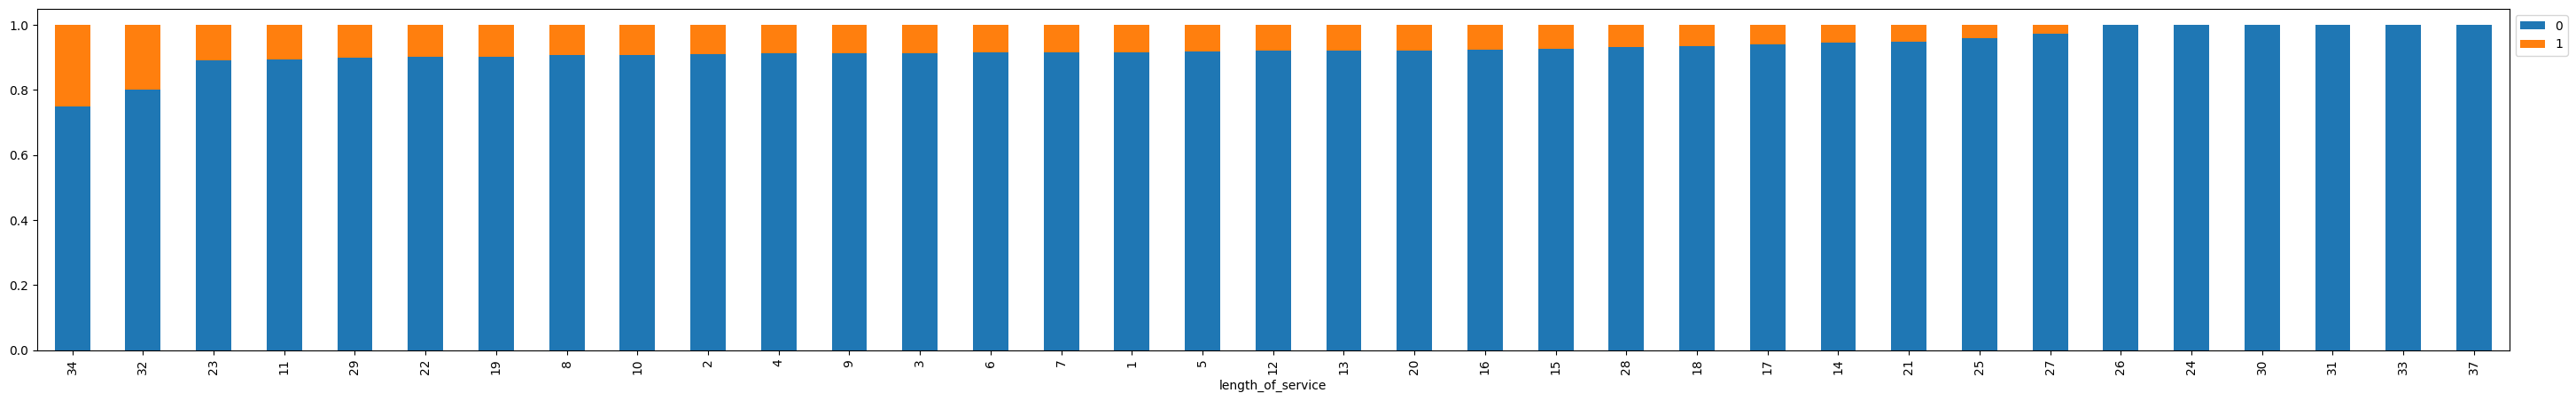

In [35]:
#Using the function to plot stacked bar chart
#Question 3 - How does the change in
#length of service (length_of_service) vary by the employee's
#promotion status (is_promoted)?
#The highest number of promotions occur at 34 and 32 years
#of service.


def stacked_barplot(df, length_of_service, is_promoted):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = df['length_of_service'].nunique()
    sorter = df['is_promoted'].value_counts().index[-1]
    tab1 = pd.crosstab(df['length_of_service'], df['is_promoted'],
                       margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(df['length_of_service'], df['is_promoted'],
                      normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

stacked_barplot(df, 'length_of_service', 'is_promoted')

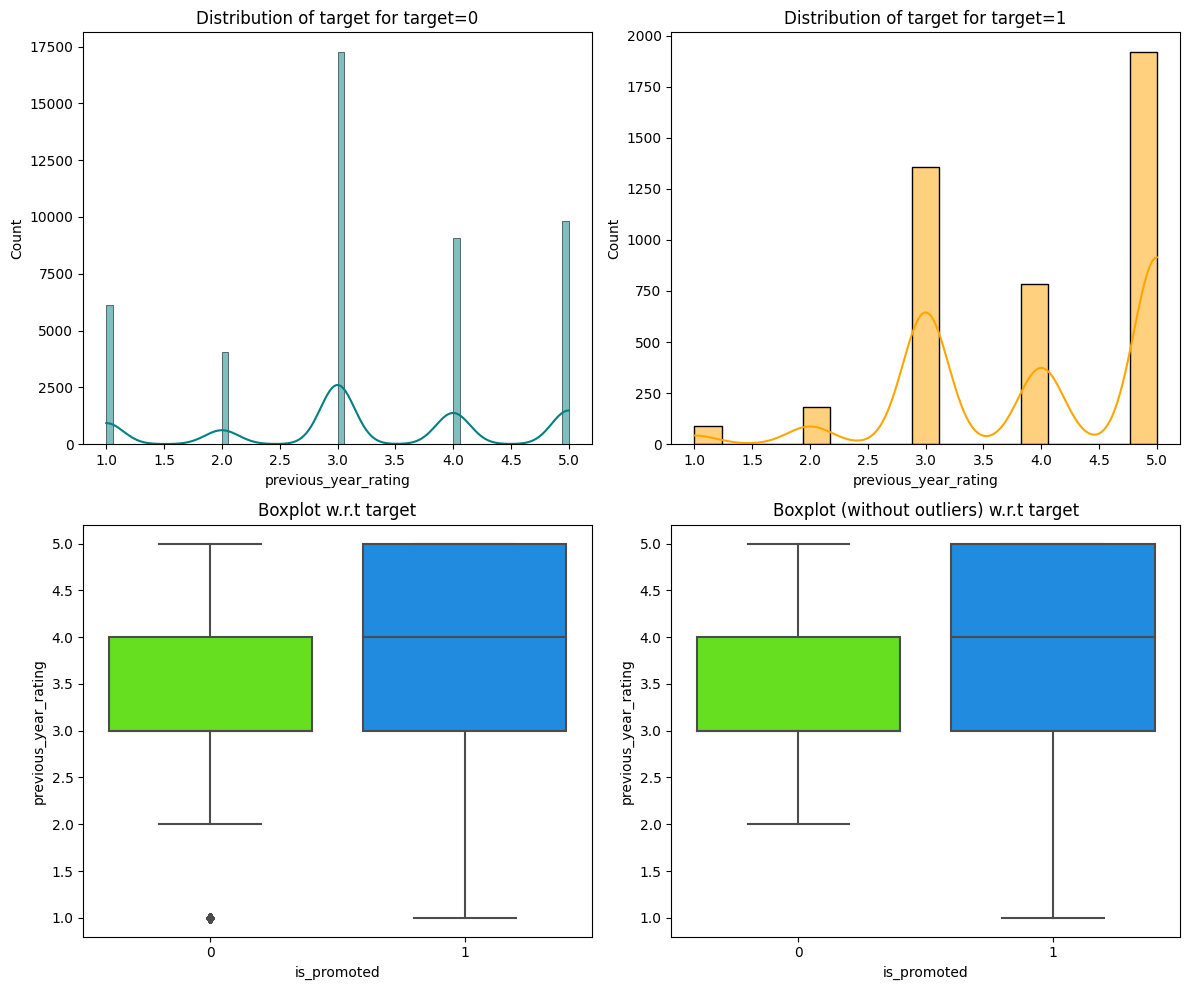

In [36]:
#Using the Function to plot distributions
#Question 4 - How does the previous rating (previous_year_rating)
#vary by the employee's promotion status (is_promoted)?
#Without outliers, the majority of employees are promoted if their
#last years rating was a 5.0.
#There are a few outliers that skew the data when it's plotted directly.
#Some of the employees that were promoted, were promoted despite an
#evaluation of 3.0.

def distribution_plot_wrt_target(df, previous_year_rating, is_promoted):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = df[is_promoted].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=df[df[is_promoted] == target_uniq[0]],
        x=previous_year_rating,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=df[df[is_promoted] == target_uniq[1]],
        x=previous_year_rating,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=df, x=is_promoted, y=previous_year_rating, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=df,
        x=is_promoted,
        y=previous_year_rating,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

distribution_plot_wrt_target(df, 'previous_year_rating', 'is_promoted')

<ipython-input-37-e1630967aba1>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()
<ipython-input-37-e1630967aba1>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

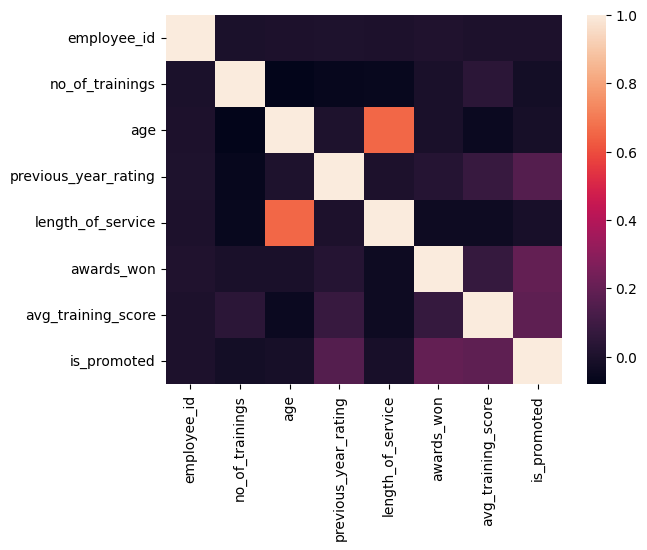

In [37]:
#Question 5 - What are the attributes with a strong correlation to
#eachother?
#Age and Length of Service correlate - this is to be expected.
#The factors that appear to correlate the most to is_promoted are
#previous_year_rating, awards_won, average_training_score.
#The employee id column is irrelevant - this is to be expected.

#Creating the heatmap of correlations
df.corr()
sns.heatmap(df.corr())

## Data Pre-processing

In [38]:
#The employee id column appears to be irrelevant.
#It can be dropped.
df.drop(['employee_id'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  object 
 1   region                54808 non-null  object 
 2   education             52399 non-null  object 
 3   gender                54808 non-null  object 
 4   recruitment_channel   54808 non-null  object 
 5   no_of_trainings       54808 non-null  int64  
 6   age                   54808 non-null  int64  
 7   previous_year_rating  50684 non-null  float64
 8   length_of_service     54808 non-null  int64  
 9   awards_won            54808 non-null  int64  
 10  avg_training_score    52248 non-null  float64
 11  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 5.0+ MB


In [39]:
#The relative percentage of rows with null values is very small
df.dropna(axis=0, inplace=True)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46380 entries, 0 to 54807
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            46380 non-null  object 
 1   region                46380 non-null  object 
 2   education             46380 non-null  object 
 3   gender                46380 non-null  object 
 4   recruitment_channel   46380 non-null  object 
 5   no_of_trainings       46380 non-null  int64  
 6   age                   46380 non-null  int64  
 7   previous_year_rating  46380 non-null  float64
 8   length_of_service     46380 non-null  int64  
 9   awards_won            46380 non-null  int64  
 10  avg_training_score    46380 non-null  float64
 11  is_promoted           46380 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 4.6+ MB


In [41]:
#Verfiy the number of unique values in each column to
#determine data pre-processing method
df.nunique()

department               9
region                  34
education                3
gender                   2
recruitment_channel      3
no_of_trainings         10
age                     41
previous_year_rating     5
length_of_service       35
awards_won               2
avg_training_score      59
is_promoted              2
dtype: int64

In [42]:
#The independent variables that are categorical need converted
#to dummy variables.
#There are some non-categorical variables -age, length_of_service
#average_training_score, region,
#and no_of_trainings will need to be
#one-hot coded into a few different bins.
df=pd.get_dummies(df, columns=['department'])
df=pd.get_dummies(df, columns=['education'])
df=pd.get_dummies(df, columns=['gender'])
df=pd.get_dummies(df, columns=['recruitment_channel'])
df=pd.get_dummies(df, columns=['previous_year_rating'])
df=pd.get_dummies(df, columns=['awards_won'])
df=pd.get_dummies(df, columns=['region'])

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46380 entries, 0 to 54807
Data columns (total 63 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   no_of_trainings               46380 non-null  int64  
 1   age                           46380 non-null  int64  
 2   length_of_service             46380 non-null  int64  
 3   avg_training_score            46380 non-null  float64
 4   is_promoted                   46380 non-null  int64  
 5   department_Analytics          46380 non-null  uint8  
 6   department_Finance            46380 non-null  uint8  
 7   department_HR                 46380 non-null  uint8  
 8   department_Legal              46380 non-null  uint8  
 9   department_Operations         46380 non-null  uint8  
 10  department_Procurement        46380 non-null  uint8  
 11  department_R&D                46380 non-null  uint8  
 12  department_Sales & Marketing  46380 non-null  uint8  
 13  d

In [55]:
#This does make the data have a large number
#of columns. However, there is no evidence that the regions can be grouped.
#There is not enough data to say that region_1 through region_5 are
#related or in close  proximity. I opted to use get_dummies and use an
#excessive number of columns to see how the model will perform.

#Change the data type of average_training_score to int.
df['avg_training_score']=df['avg_training_score'].astype(int)

#The following columns need to be one-hot coded
#before using get_dummies:
#age, length_of_service, average_training_score, region,
#and no_of_trainings.

#Converting age into categories 0, 1, 2, 3
#age_cols={'0': [20<=df['age']<30], '1': [30<=df['age']<40], '2': [40<=df['age']<50], '3': [50<=df['age']<=60]}
#print(age_cols)
#Converting length_of_service into categories 0, 1, 2, 3

#Converting average_training score into categories 0, 1, 2, 3

#Converting region into categories 0, 1, 2, 3

#Converting no_of_trainings into categories 0, 1, 2


In [56]:
#Verify all data categories are now integers using info.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46380 entries, 0 to 54807
Data columns (total 63 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   no_of_trainings               46380 non-null  int64
 1   age                           46380 non-null  int64
 2   length_of_service             46380 non-null  int64
 3   avg_training_score            46380 non-null  int64
 4   is_promoted                   46380 non-null  int64
 5   department_Analytics          46380 non-null  uint8
 6   department_Finance            46380 non-null  uint8
 7   department_HR                 46380 non-null  uint8
 8   department_Legal              46380 non-null  uint8
 9   department_Operations         46380 non-null  uint8
 10  department_Procurement        46380 non-null  uint8
 11  department_R&D                46380 non-null  uint8
 12  department_Sales & Marketing  46380 non-null  uint8
 13  department_Technology         4

In [58]:
#Splitting the data for model building.
x=df.drop('is_promoted', axis=1)
y=df['is_promoted']

X_temp, X_test, y_temp, y_test = train_test_split(x,y, test_size=0.2, random_state=1, stratify=y)

#Splitting temporary set into training and validation
X_train, X_val, y_train, y_val = train_test_split(X_temp,y_temp, test_size=0.25, random_state=1, stratify=y_temp)

#Examine the split data
print(X_train.shape, X_val.shape, X_test.shape)

(27828, 62) (9276, 62) (9276, 62)


## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [60]:
#Defining a function to compute different metrics to check performance of a
#classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

In [61]:
#Defining a function to generate the confusion matrix.
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")


### Model Building with original data

Sample code for model building with original data

In [63]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("DecisionTree", DecisionTreeClassifier(random_state=1)))
models.append(("Random Forest", RandomForestClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1)))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic regression: 0.215309046254605
Bagging: 0.8628735161686452
DecisionTree: 0.9975440032746623
Random Forest: 0.997134670487106
AdaBoost: 0.18706508391322144
XGBoost: 0.3962341383544822

Validation Performance:



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic regression: 0.23464373464373464
Bagging: 0.3476658476658477
DecisionTree: 0.41277641277641275
Random Forest: 0.2665847665847666
AdaBoost: 0.20147420147420148
XGBoost: 0.3488943488943489


### Model Building with Oversampled data


In [68]:
print("Before UpSampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before UpSampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After UpSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After UpSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before UpSampling, counts of label 'Yes': 2443
Before UpSampling, counts of label 'No': 25385 

After UpSampling, counts of label 'Yes': 25385
After UpSampling, counts of label 'No': 25385 

After UpSampling, the shape of train_X: (50770, 62)
After UpSampling, the shape of train_y: (50770,) 



In [69]:
models = []  # Empty list to store all the Oversampled models

# Appending oversampled models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("DecisionTree", DecisionTreeClassifier(random_state=1)))
models.append(("Random Forest", RandomForestClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1)))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic regression: 0.8903683277526098
Bagging: 0.9912546779594249
DecisionTree: 0.9996848532597991
Random Forest: 0.9996454599172739
AdaBoost: 0.8749655308252905
XGBoost: 0.9362615717943668

Validation Performance:



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic regression: 0.3353808353808354
Bagging: 0.3402948402948403
DecisionTree: 0.40540540540540543
Random Forest: 0.28378378378378377
AdaBoost: 0.33292383292383293
XGBoost: 0.33906633906633904


In [ ]:
#With oversampled data, the decision tree still has the best recall score.

### Model Building with Undersampled data

In [70]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [71]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 2443
Before Under Sampling, counts of label 'No': 25385 

After Under Sampling, counts of label 'Yes': 2443
After Under Sampling, counts of label 'No': 2443 

After Under Sampling, the shape of train_X: (4886, 62)
After Under Sampling, the shape of train_y: (4886,) 



In [72]:
models = []  # Empty list to store all the Undersampled models

# Appending undersampled models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("DecisionTree", DecisionTreeClassifier(random_state=1)))
models.append(("Random Forest", RandomForestClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1)))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Logistic regression: 0.6913630781825624


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Bagging: 0.9688907081457224
DecisionTree: 1.0
Random Forest: 1.0
AdaBoost: 0.6921817437576749
XGBoost: 0.8743348342202211

Validation Performance:

Logistic regression: 0.6916461916461917


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Bagging: 0.6203931203931204
DecisionTree: 0.6633906633906634
Random Forest: 0.6707616707616708
AdaBoost: 0.6977886977886978
XGBoost: 0.6793611793611793


In [ ]:
#With undersampled data, AdaBoost appears to have the best recall score.

### HyperparameterTuning

#### Sample Parameter Grids

**Hyperparameter tuning can take a long time to run, so to avoid that time complexity - you can use the following grids, wherever required.**

- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
     "n_estimators": np.arange(10, 110, 10),
     "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
     "base_estimator": [
         DecisionTreeClassifier(max_depth=1, random_state=1),
         DecisionTreeClassifier(max_depth=2, random_state=1),
         DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For Logistic Regression:

```
param_grid = {'C': np.arange(0.1,1.1,0.1)}

```
- For XGBoost:

```
param_grid={
   'n_estimators':np.arange(50,300,50),
   'scale_pos_weight':[0,1,2,5,10],
   'learning_rate':[0.01,0.1,0.2,0.05],
   'gamma':[0,1,3,5],
   'subsample':[0.7,0.8,0.9,1]
}
```

#### Sample tuning method for Decision tree with original data

In [92]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=None, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 15, 'max_depth': 5} with CV score=0.9250034947775271:


#### Sample tuning method for Decision tree with oversampled data

In [94]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=None, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 15, 'max_depth': 5} with CV score=0.7839078195784912:


#### Sample tuning method for Decision tree with undersampled data

In [95]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,20),
              'min_samples_leaf': [1, 2, 5, 7],
              'max_leaf_nodes' : [5, 10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=None, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 1, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 15, 'max_depth': 11} with CV score=0.698118274505864:


## Model Comparison and Final Model Selection

   Accuracy    Recall  Precision        F1
0  0.904421  0.874335   0.930314  0.901456


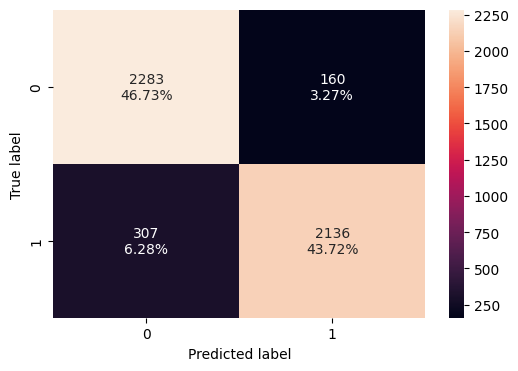

In [102]:
#The best model for this project appears to be the Decision Tree Model
#Using the undersampled data gives the best results and most accurate
#picture of how the model fits the training data.

DTC=model_performance_classification_sklearn(model, X_train_un, y_train_un)
print(DTC)

confusion_matrix_sklearn(model, X_train_un, y_train_un)

### Test set final performance

   Accuracy    Recall  Precision        F1
0  0.759595  0.689189    0.22104  0.334726


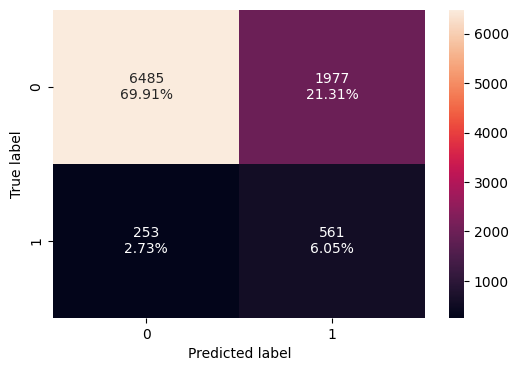

In [100]:
#The Decision Tree does not seem to perfom as well on the complete set
#of test data.
#The model is likely overfit to the training data.
#The test data set is imbalanced.
#Oversampling is required to get a good fit on the training
#and validation data.
#The false positives are relatively high.

DTC=model_performance_classification_sklearn(model, X_test, y_test)
print(DTC)

confusion_matrix_sklearn(model, X_test, y_test)

   Accuracy    Recall  Precision        F1
0  0.928741  0.227273   0.852535  0.358875


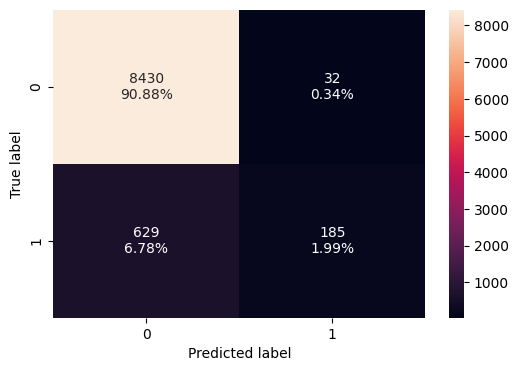

In [111]:
#Modifying Decision Tree Classifier Parameters
#using the parameters given in the Randomized Search.
#I updated the decision tree model to reflect the hyperparameters output
#from the tuning section.
#The accuracy and precison stay high
#The recall and F1 scores are very low.
#The confusion matrix shows very good results with low amounts of
#FP and FN results.
#Again reflecting the data imbalance.

Model = DecisionTreeClassifier(min_samples_leaf=7, min_impurity_decrease=0.0001, max_leaf_nodes=15, max_depth=5, random_state=1)
DTC_Tuned=Model.fit(X_test, y_test)
DTC_Score=model_performance_classification_sklearn(DTC_Tuned, X_test, y_test)
print(DTC_Score)

confusion_matrix_sklearn(Model, X_test, y_test)

## Pipelines to build the final model


# Business Insights and Conclusions

- The imbalance in the data appears to reflect that every time an employee meets the criteria for promotion, they are promoted. The confusion matrix of the tuned model is reversed. A zero value for is_promoted means that they were not promoted. A one value for is_promoted meeans that they were promoted. The quadrant on the CM that is 1,1 are the employees that were promoted and predicted to be promoted.  
- The factors most likely to determine whether an employee is promoted are: their rating from last year, average training scores, awards won, and then length of service and age follow those factors.
- The company can determine which employees will be promoted based on performance. Generally it improves with more experience in their role - higher length of service and higher age.


***